In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [18]:
from dataloader import convert_to_lowercase

In [20]:
df_train = pd.read_csv("data/train.csv")
df_train = convert_to_lowercase(df_train)
df_train.shape

(20254, 21)

In [21]:
df_train[df_train["price"] == 0].shape

(101, 21)

In [22]:
df_train = df_train[df_train["price"] > 0]

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

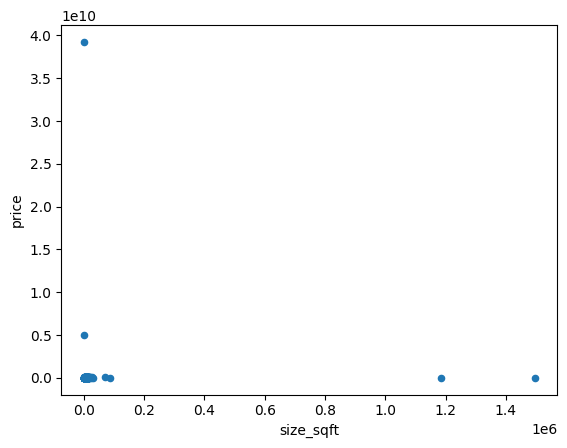

In [25]:
df_train.plot.scatter("size_sqft", "price")

# Large price ( > 10 ** 9)

In [28]:
df_train[df_train.price > 1 * 10 ** 9]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
5976,385586,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,3.924243e+10
16264,287109,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,129,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,4.985919e+09


* High prices for very small area

# Disproportionate `num_beds` and `num_baths`

<AxesSubplot:xlabel='num_beds', ylabel='num_baths'>

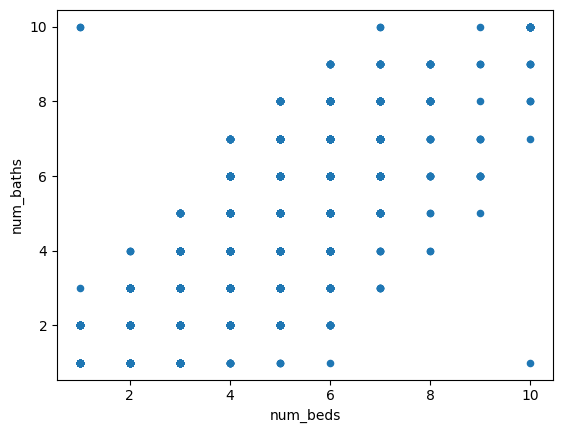

In [30]:
df_train.plot.scatter("num_beds", "num_baths")

In [31]:
df_train[(df_train["num_beds"] == 1) & (df_train["num_baths"] == 10)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
5976,385586,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,3.924243e+10
16264,287109,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,129,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,4.985919e+09


In [39]:
df_train[(df_train["num_beds"] == 10) & (df_train["num_baths"] == 1)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
10084,504907,10 bed house for sale in raffles park,oriole crescent,raffles park,bungalow,freehold,1992.0,10.0,1.0,12000,...,unspecified,"studio, 4, 5, 6, 7, 8, 9, 10 br",NaN,https://www.99.co/singapore/houses/raffles-par...,1.284235,103.851485,0,raffles place,downtown core,23625000.0


In [36]:
df_train[(df_train["property_name"].str.contains("raffles park"))].shape

(21, 21)

In [37]:
df_train[(df_train["property_name"].str.contains("raffles park"))].groupby(["num_beds", "num_baths"])["listing_id"].count()

num_beds  num_baths
4.0       2.0          1
          3.0          1
          4.0          1
5.0       3.0          1
          4.0          4
          5.0          2
          6.0          1
6.0       5.0          1
7.0       5.0          1
          8.0          4
8.0       8.0          1
9.0       8.0          1
          9.0          1
10.0      1.0          1
Name: listing_id, dtype: int64

<AxesSubplot:xlabel='num_beds', ylabel='num_baths'>

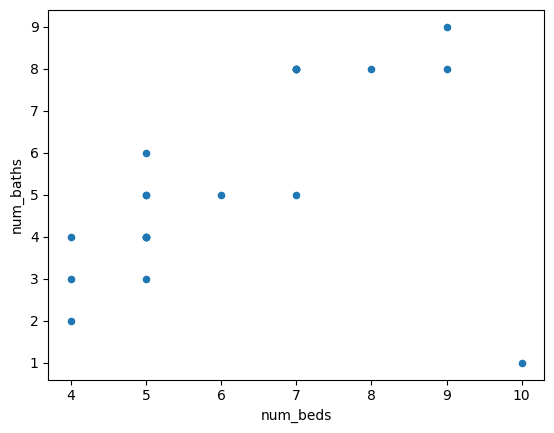

In [38]:
df_train[(df_train["property_name"].str.contains("raffles park"))].plot.scatter(x="num_beds", y="num_baths")

# Large size_sqft

In [41]:
df_train[df_train.size_sqft > 1 * 10 ** 6]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
2701,160293,3 bed condo for sale in jlb residences,169 jalan loyang besar,jlb residences,condo,946-year leasehold,2008.0,3.0,2.0,1185000,...,unfurnished,3 br,36.0,https://www.99.co/singapore/condos-apartments/...,1.379105,103.960613,0,pasir ris park,pasir ris,1244200.0
18446,771950,4 bed condo for sale in avenue south residence,1 silat avenue,avenue south residence,condo,99-year leasehold,2023.0,4.0,4.0,1496000,...,unspecified,"studio, 1, 2, 3, 4 br",1074.0,https://www.99.co/singapore/condos-apartments/...,1.304855,103.773776,0,dover,queenstown,3040800.0


In [43]:
df_train[(df_train["property_name"].str.contains("jlb residences"))]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
2701,160293,3 bed condo for sale in jlb residences,169 jalan loyang besar,jlb residences,condo,946-year leasehold,2008.0,3.0,2.0,1185000,...,unfurnished,3 br,36.0,https://www.99.co/singapore/condos-apartments/...,1.379105,103.960613,0,pasir ris park,pasir ris,1244200.0
19551,860958,3 bed condo for sale in jlb residences,169 jalan loyang besar,jlb residences,apartment,946-year leasehold,2008.0,3.0,2.0,958,...,unspecified,3 br,36.0,https://www.99.co/singapore/condos-apartments/...,1.379105,103.960613,0,pasir ris park,pasir ris,1244200.0


<AxesSubplot:xlabel='size_sqft', ylabel='price'>

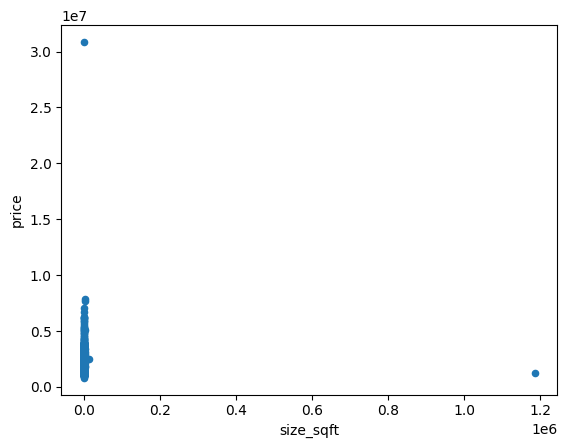

In [48]:
df_train[(df_train["property_type"].str.contains("condo")) & (df_train["num_beds"] == 3) & (df_train["num_baths"] == 2)].plot.scatter("size_sqft", "price")

In [49]:
df = df_train[(df_train["property_type"].str.contains("condo")) & (df_train["num_beds"] == 3) & (df_train["num_baths"] == 2)]
df[df["price"] > 1 * 10 ** 7]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
663,122873,3 bed condo for sale in midtown modern,18 tan quee lan street,midtown modern,condo,99-year leasehold,2024.0,3.0,2.0,1066,...,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",558.0,https://www.99.co/singapore/condos-apartments/...,1.298416,103.857178,0,bugis,downtown core,30880500.0


In [51]:
df_train[(df_train["property_name"].str.contains("midtown modern"))]["property_type"].value_counts()

condo        131
apartment      5
Name: property_type, dtype: int64

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

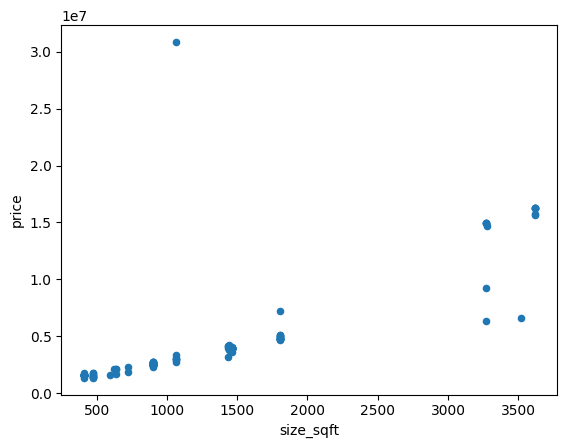

In [52]:
df_train[(df_train["property_name"].str.contains("midtown modern"))].plot.scatter("size_sqft", "price")

In [45]:
df_train[(df_train["property_name"].str.contains("avenue south residence"))].shape

(110, 21)

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

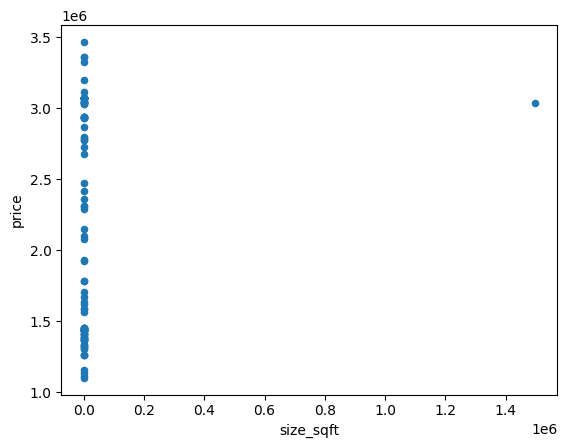

In [46]:
df_train[(df_train["property_name"].str.contains("avenue south residence"))].plot.scatter("size_sqft", "price")

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

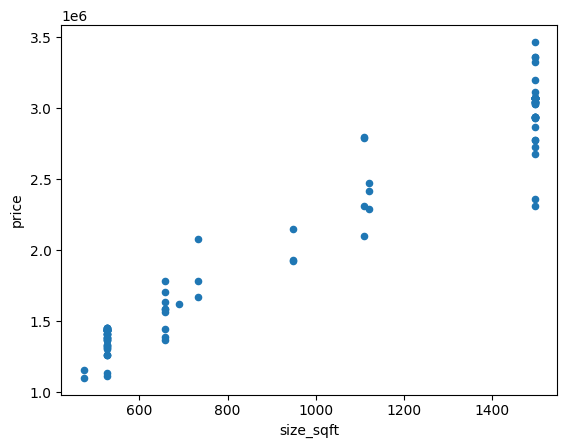

In [47]:
df = df_train[(df_train["property_name"].str.contains("avenue south residence"))]
df[df["size_sqft"] < 1 * 10 ** 6].plot.scatter("size_sqft", "price")

### These properties seem like outliers
* 2701
* 18446
* 663

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

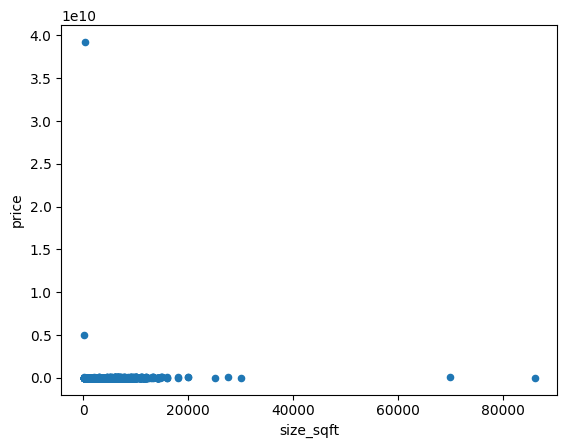

In [72]:
df_train[(df_train["size_sqft"] < 1 * 10 ** 6)].plot.scatter("size_sqft", "price")

Possible outliers > 40000 sqft

In [74]:
df_train[(df_train["size_sqft"] > 40000)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
2701,160293,3 bed condo for sale in jlb residences,169 jalan loyang besar,jlb residences,condo,946-year leasehold,2008.0,3.0,2.0,1185000,...,unfurnished,3 br,36.0,https://www.99.co/singapore/condos-apartments/...,1.379105,103.960613,0,pasir ris park,pasir ris,1244200.0
4287,753969,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,7.0,86080,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.932790,0,siglap,bedok,6279000.0
15637,522703,6 bed house for sale in swiss club park,jalan senandong,swiss club park,bungalow,freehold,1997.0,6.0,6.0,70000,...,unspecified,"4, 5, 6, 7 br",NaN,https://www.99.co/singapore/houses/swiss-club-...,1.335877,103.789611,0,swiss club,bukit timah,40950000.0
18446,771950,4 bed condo for sale in avenue south residence,1 silat avenue,avenue south residence,condo,99-year leasehold,2023.0,4.0,4.0,1496000,...,unspecified,"studio, 1, 2, 3, 4 br",1074.0,https://www.99.co/singapore/condos-apartments/...,1.304855,103.773776,0,dover,queenstown,3040800.0


In [81]:
df_train[(df_train["property_name"].str.contains("bedok park"))].shape

(16, 21)

In [82]:
df_train[(df_train["property_name"].str.contains("bedok park"))].sort_values("size_sqft", ascending=False)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
4287,753969,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,7.0,86080,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
3073,320892,10 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,10.0,10.0,9600,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6510000.0
5589,336044,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,6.0,8083,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
14937,528400,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,6.0,8048,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
318,409887,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,7.0,8000,...,unfurnished,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
6698,353658,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,6.0,8000,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
7428,880986,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,6.0,8000,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
10442,943670,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,7.0,8000,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
11612,714038,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,6.0,8000,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0
12689,331868,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,7.0,8000,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.93279,0,siglap,bedok,6279000.0


array([[<AxesSubplot:title={'center':'size_sqft'}>]], dtype=object)

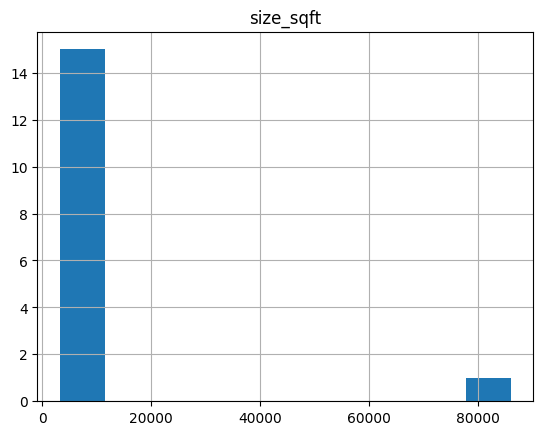

In [78]:
df_train[(df_train["property_name"].str.contains("bedok park"))].hist("size_sqft")

4287 is potentially an outlier. Other similar units have much smaller size.

In [84]:
df_train[(df_train["property_name"].str.contains("swiss club park"))]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
3054,791772,7 bed house for sale in swiss club park,jalan senandong,swiss club park,bungalow,freehold,1997.0,7.0,9.0,9000,...,unspecified,"4, 5, 6, 7 br",NaN,https://www.99.co/singapore/houses/swiss-club-...,1.335877,103.789611,0,swiss club,bukit timah,47250000.0
5332,353249,7 bed house for sale in swiss club park,jalan senandong,swiss club park,bungalow,freehold,1997.0,7.0,5.0,13000,...,unspecified,"4, 5, 6, 7 br",NaN,https://www.99.co/singapore/houses/swiss-club-...,1.335877,103.789611,0,swiss club,bukit timah,55755000.0
15637,522703,6 bed house for sale in swiss club park,jalan senandong,swiss club park,bungalow,freehold,1997.0,6.0,6.0,70000,...,unspecified,"4, 5, 6, 7 br",NaN,https://www.99.co/singapore/houses/swiss-club-...,1.335877,103.789611,0,swiss club,bukit timah,40950000.0


15637 is also potentially another outlier

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

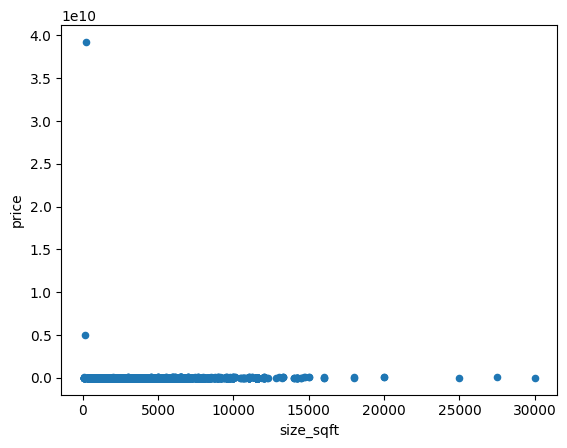

In [105]:
df_train[(df_train["size_sqft"] < 40000)].plot.scatter("size_sqft", "price")

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

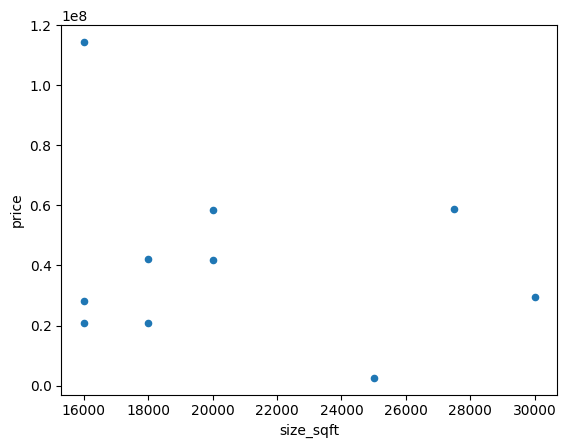

In [108]:
df_train[(df_train["size_sqft"] < 40000) & (df_train["size_sqft"] > 15000)].plot.scatter("size_sqft", "price")

In [111]:
df_train[(df_train["size_sqft"] < 40000) & (df_train["size_sqft"] > 20000)].shape

(3, 21)

In [112]:
df_train[(df_train["size_sqft"] < 40000) & (df_train["size_sqft"] > 20000)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
1649,149017,10 bed house for sale in braddell heights estate,cotswold close,braddell heights estate,bungalow,freehold,2011.0,10.0,10.0,30000,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.346020,103.867198,0,lorong chuan,serangoon,29400000.0
13461,571444,6 bed house for sale in westville,westwood terrace,westville,terraced house,99-year leasehold,1997.0,6.0,5.0,25003,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2625000.0
13589,476002,8 bed house for sale in ladyhill park,fernhill road,ladyhill park,bungalow,freehold,1990.0,8.0,9.0,27500,...,unspecified,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311925,103.824001,0,nassim,tanglin,58800000.0


In [116]:
df_train[(df_train["property_name"].str.contains("westville"))].sort_values("size_sqft", ascending=False)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
13461,571444,6 bed house for sale in westville,westwood terrace,westville,terraced house,99-year leasehold,1997.0,6.0,5.0,25003,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2625000.0
7615,270843,6 bed house for sale in westville,westwood avenue,westville,terraced house,99-year leasehold,1997.0,6.0,5.0,3200,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2625000.0
4940,273085,5 bed house for sale in westville,westwood avenue,westville,terraced house,99-year leasehold,1997.0,5.0,5.0,2500,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2394000.0
10862,848858,5 bed house for sale in westville,westwood avenue,westville,corner terrace,99-year leasehold,1997.0,5.0,5.0,2500,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,3032400.0
11705,971653,6 bed house for sale in westville,westwood terrace,westville,terraced house,99-year leasehold,1997.0,6.0,5.0,2500,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2625000.0
12931,826376,4 bed house for sale in westville,westwood avenue,westville,semi-detached house,99-year leasehold,1997.0,4.0,4.0,2152,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2730000.0


<AxesSubplot:xlabel='size_sqft', ylabel='price'>

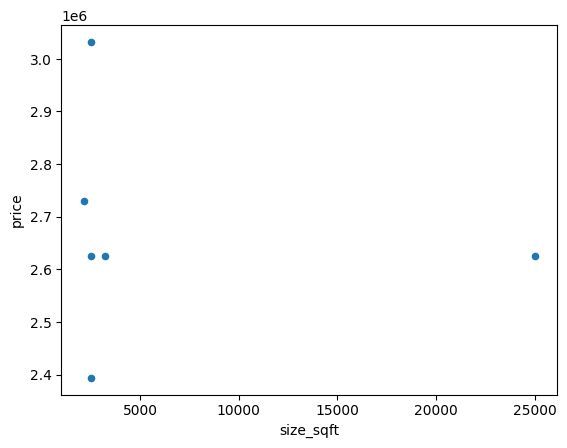

In [114]:
df_train[(df_train["property_name"].str.contains("westville"))].plot.scatter("size_sqft", "price")

13461 is potentially an outlier

In [118]:
df_train[(df_train["property_name"].str.contains("ladyhill park"))].sort_values("size_sqft", ascending=False)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
13589,476002,8 bed house for sale in ladyhill park,fernhill road,ladyhill park,bungalow,freehold,1990.0,8.0,9.0,27500,...,unspecified,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311925,103.824001,0,nassim,tanglin,58800000.0
6495,887337,5 bed house for sale in ladyhill park,lady hill road,ladyhill park,bungalow,freehold,1990.0,5.0,5.0,20000,...,unfurnished,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311458,103.825221,0,nassim,tanglin,58590000.0
7091,240979,5 bed house for sale in ladyhill park,lady hill road,ladyhill park,bungalow,freehold,1990.0,5.0,5.0,7000,...,unspecified,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311458,103.825221,0,nassim,tanglin,58800000.0
8128,943767,6 bed house for sale in ladyhill park,fernhill road,ladyhill park,bungalow,freehold,1990.0,6.0,6.0,5000,...,unspecified,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311925,103.824001,0,nassim,tanglin,58800000.0
4347,841128,3 bed house for sale in ladyhill park,fernhill road,ladyhill park,bungalow,freehold,1990.0,3.0,2.0,2000,...,unspecified,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311925,103.824001,0,nassim,tanglin,89250000.0


<AxesSubplot:xlabel='size_sqft', ylabel='price'>

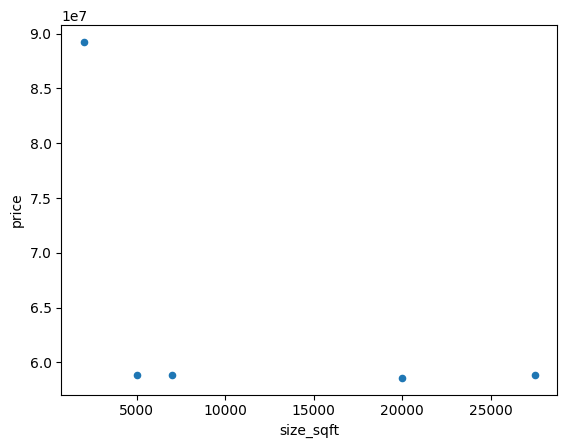

In [119]:
df_train[(df_train["property_name"].str.contains("ladyhill park"))].plot.scatter("size_sqft", "price")

* There seems to be an outlier at the other end
* Also for these properties, the price is constant respective of the other factors. <br>Maybe we should consider using property_names also. Since sklearn cannot handle NaNs, we can try XGBoost or some other regressor which can handle NaNs.

In [124]:
df_train.iloc[4347]

listing_id                                                         249225
title                           hdb flat for sale in 610 yishun street 61
address                                          sembawang / yishun (d27)
property_name                                    nee soon central meadows
property_type                                                 hdb 4 rooms
tenure                                                  99-year leasehold
built_year                                                         1986.0
num_beds                                                              3.0
num_baths                                                             2.0
size_sqft                                                             904
floor_level                                                           mid
furnishing                                                    unspecified
available_unit_types                                           3, 4, 5 br
total_num_units                       

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

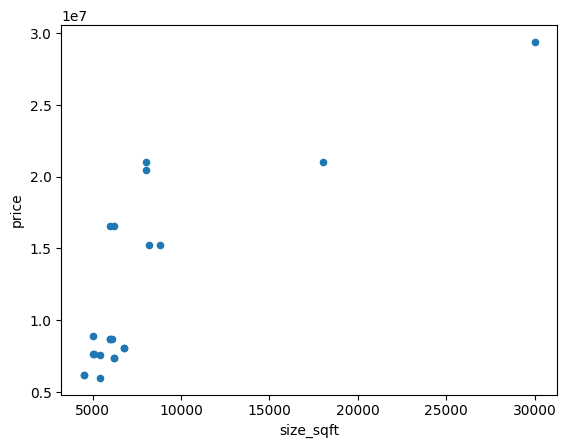

In [125]:
df_train[(df_train["property_name"].str.contains("braddell heights estate"))].plot.scatter("size_sqft", "price")

In [127]:
df_train[(df_train["property_name"].str.contains("braddell heights estate"))].shape

(22, 21)

In [131]:
df_train[(df_train["property_name"].str.contains("braddell heights estate"))].sort_values("size_sqft", ascending=False).head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
1649,149017,10 bed house for sale in braddell heights estate,cotswold close,braddell heights estate,bungalow,freehold,2011.0,10.0,10.0,30000,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.34602,103.867198,0,lorong chuan,serangoon,29400000.0
5771,878816,6 bed house for sale in braddell heights estate,cotswold close,braddell heights estate,bungalow,freehold,2011.0,6.0,7.0,18000,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.34602,103.867198,0,lorong chuan,serangoon,21000000.0
10436,703761,6 bed house for sale in braddell heights estate,chiltern drive,braddell heights estate,bungalow,freehold,2011.0,6.0,6.0,8800,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.34602,103.867198,0,lorong chuan,serangoon,15225000.0
20053,398048,6 bed house for sale in braddell heights estate,chiltern drive,braddell heights estate,bungalow,freehold,2011.0,6.0,6.0,8200,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.34602,103.867198,0,lorong chuan,serangoon,15225000.0
3952,534198,7 bed house for sale in braddell heights estate,cotswold close,braddell heights estate,bungalow,freehold,2011.0,7.0,7.0,8000,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.34602,103.867198,0,lorong chuan,serangoon,21000000.0


Not sure if we should consider those 2 units as outliers

Upper bound for `size_sqft` can be 40000

# Small `price`

In [79]:
df_train["price"].min()

249900.0

# Small `size_sqft`

In [55]:
df_train["size_sqft"].min()

65

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

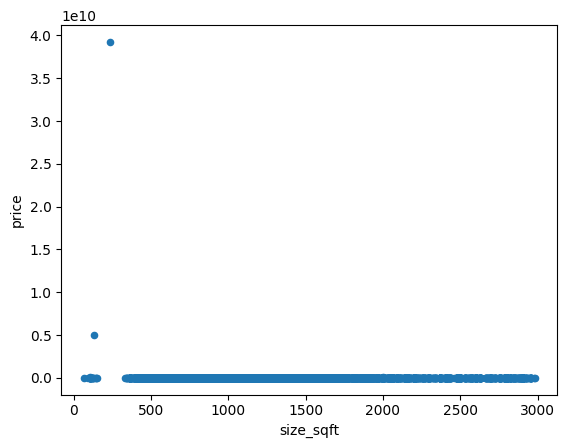

In [57]:
df_train[df_train["size_sqft"] < 3000].plot.scatter("size_sqft", "price")

There is gap around 200 to 400

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

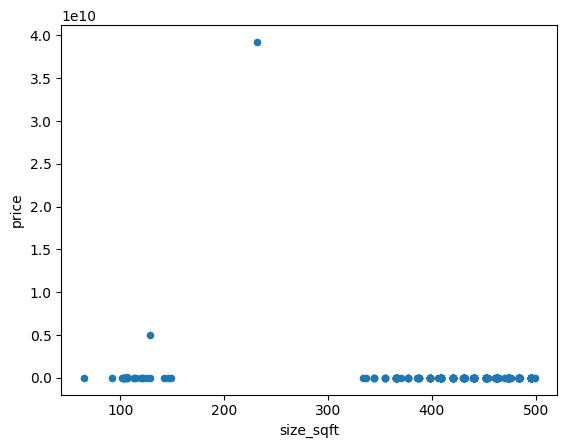

In [58]:
df_train[df_train["size_sqft"] < 500].plot.scatter("size_sqft", "price")

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

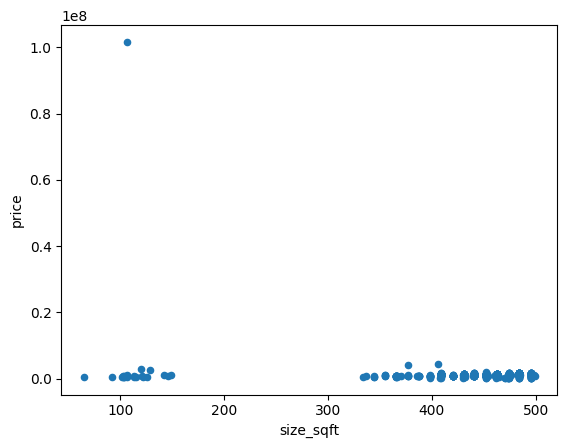

In [63]:
df = df_train[df_train["size_sqft"] < 500]
df[df["price"] < 1 * 10 ** 9].plot.scatter("size_sqft", "price")

In [65]:
df[df["price"] > 1 * 10 ** 8]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
635,432676,3 bed house for sale in the glencaird residences,dalvey road,the glencaird residences,land only,freehold,2000.0,3.0,3.0,107,...,unspecified,"3, 4, 5, 6 br",12.0,https://www.99.co/singapore/houses/the-glencai...,1.315477,103.819725,0,nassim,tanglin,1.016400e+08
5976,385586,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,3.924243e+10
16264,287109,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,129,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,4.985919e+09


In [62]:
df_train[df_train["size_sqft"] < 200]["property_type"].value_counts()

hdb 4 rooms    9
hdb 5 rooms    5
hdb            4
hdb 3 rooms    3
condo          2
land only      1
Name: property_type, dtype: int64

<AxesSubplot:xlabel='num_beds', ylabel='num_baths'>

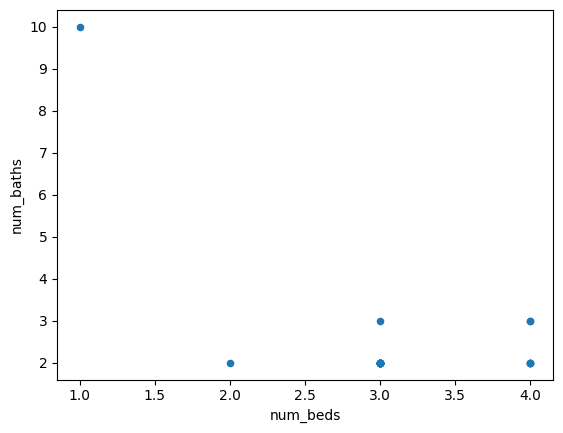

In [61]:
df_train[df_train["size_sqft"] < 200].plot.scatter("num_beds", "num_baths")

The number of rooms and baths cannot fit in less than 200 size sqft.

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

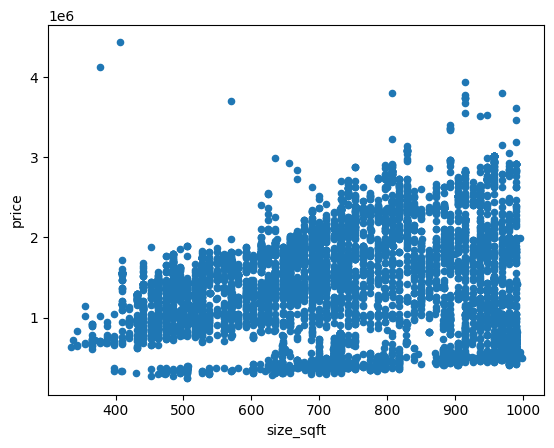

In [88]:
df_train[(df_train["size_sqft"] > 300) & (df_train["size_sqft"] < 1000)].plot.scatter("size_sqft", "price")

There seem to be a couple of outliers at 400 and ~550

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

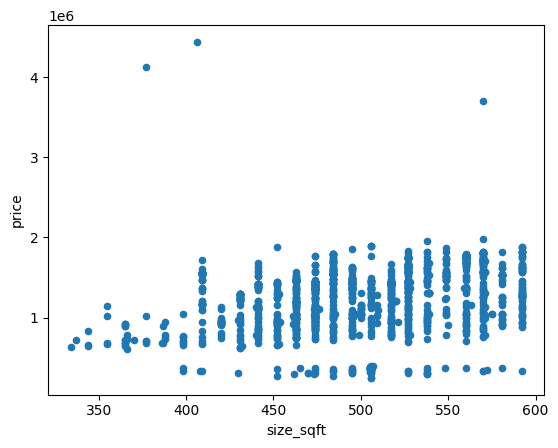

In [89]:
df_train[(df_train["size_sqft"] > 300) & (df_train["size_sqft"] < 600)].plot.scatter("size_sqft", "price")

In [90]:
df = df_train[(df_train["size_sqft"] > 300) & (df_train["size_sqft"] < 600)]
df[df["price"] > 3 * 10 ** 6]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
9750,458270,3 bed condo for sale in mayfair gardens,8 rifle range road,mayfair gardens,condo,99-year leasehold,2024.0,3.0,1.0,570,...,unfurnished,"studio, 1, 2, 3, 4, 5 br",215.0,https://www.99.co/singapore/condos-apartments/...,1.353317,103.789625,0,central water catchment,central water catchment,3705400.0
14218,708112,5 bed house for sale in belgravia ace,belgravia drive,belgravia ace,cluster house,freehold,2028.0,5.0,5.0,406,...,partial,"studio, 2, 4, 5, 6 br",107.0,https://www.99.co/singapore/houses/belgravia-a...,1.378467,103.865061,0,seletar hills,serangoon,4437300.0
15027,846946,5 bed house for sale in belgravia ace,belgravia drive,belgravia ace,cluster house,freehold,2028.0,5.0,5.0,377,...,partial,"studio, 2, 4, 5, 6 br",107.0,https://www.99.co/singapore/houses/belgravia-a...,1.378467,103.865061,0,seletar hills,serangoon,4120200.0


In [91]:
df_train[(df_train["property_name"].str.contains("belgravia ace"))].shape


(31, 21)

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

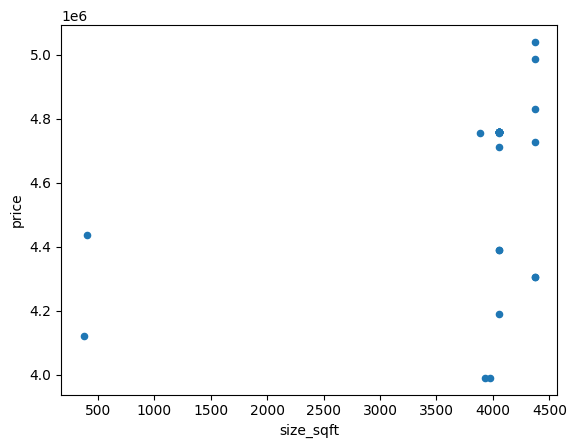

In [92]:
df_train[(df_train["property_name"].str.contains("belgravia ace"))].plot.scatter("size_sqft", "price")

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

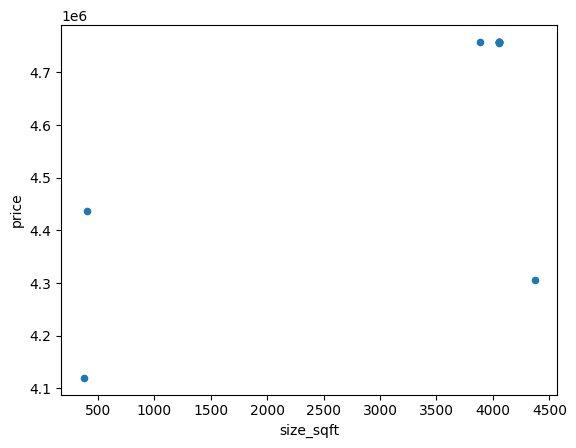

In [94]:
df = df_train[(df_train["property_name"].str.contains("belgravia ace"))]
df[(df["num_beds"] == 5) & (df["num_baths"] == 5)].plot.scatter("size_sqft", "price")

Those two units seem to be outliers

In [95]:
df_train[(df_train["property_name"].str.contains("mayfair gardens"))].shape

(40, 21)

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

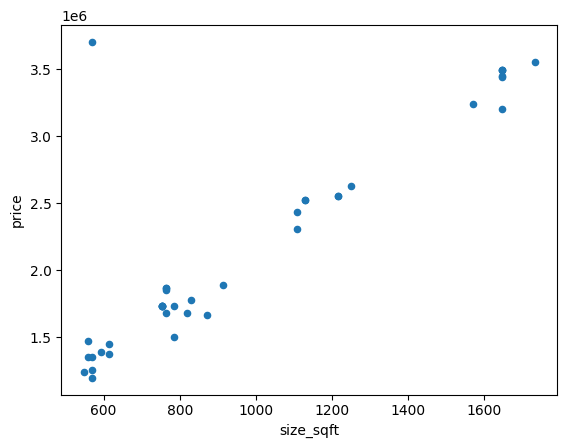

In [96]:
df_train[(df_train["property_name"].str.contains("mayfair gardens"))].plot.scatter("size_sqft", "price")

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

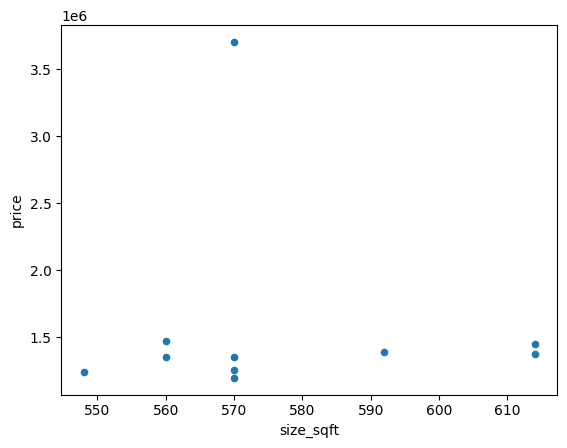

In [98]:
df = df_train[(df_train["property_name"].str.contains("mayfair gardens"))]
df[df["size_sqft"] < 700].plot.scatter("size_sqft", "price")

Looking at the general trend, there seems to be a clear pattern between size and price. <br>
And that one unit could be classified as an outlier.

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

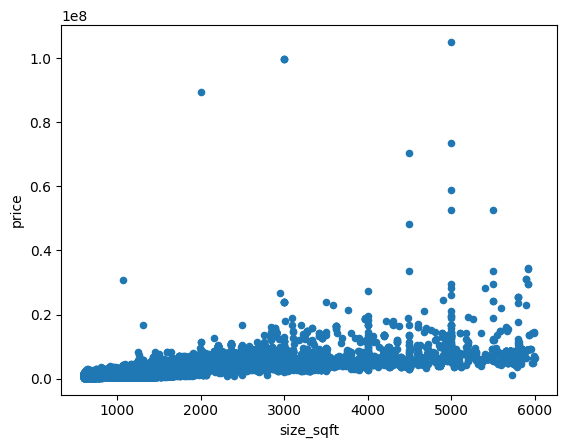

In [104]:
df_train[(df_train["size_sqft"] > 600) & (df_train["size_sqft"] < 6000)].plot.scatter("size_sqft", "price")

Possible Outliers at 1000, 2000, 3000, 4500, 5000, 5500

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

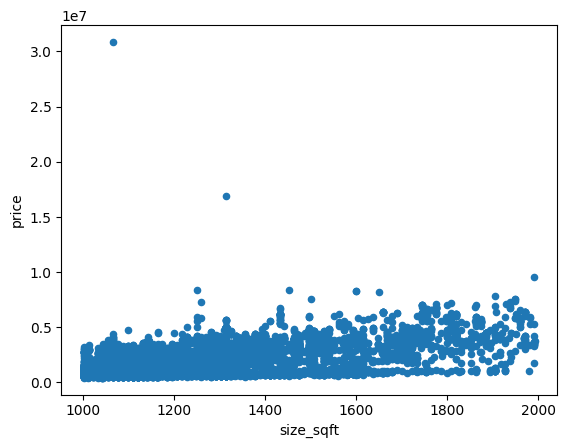

In [133]:
df_train[(df_train["size_sqft"] > 1000) & (df_train["size_sqft"] < 2000)].plot.scatter("size_sqft", "price")

In [134]:
df = df_train[(df_train["size_sqft"] > 1000) & (df_train["size_sqft"] < 2000)]
df[df["price"] > 10 ** 7]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
663,122873,3 bed condo for sale in midtown modern,18 tan quee lan street,midtown modern,condo,99-year leasehold,2024.0,3.0,2.0,1066,...,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",558.0,https://www.99.co/singapore/condos-apartments/...,1.298416,103.857178,0,bugis,downtown core,30880500.0
19587,891247,4 bed ec for sale in north gaia,41 yishun close,north gaia,executive condo,99-year leasehold,2027.0,4.0,3.0,1313,...,partial,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0,yishun east,yishun,16884000.0


Already looked at 663

In [137]:
df_train[(df_train["property_name"].str.contains("north gaia"))].shape

(254, 21)

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

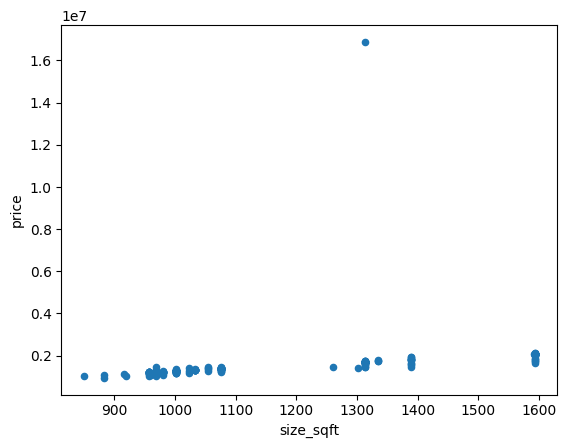

In [138]:
df_train[(df_train["property_name"].str.contains("north gaia"))].plot.scatter("size_sqft", "price")

In [141]:
df_train[(df_train["property_name"].str.contains("north gaia"))].sort_values("price", ascending=False).head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
19587,891247,4 bed ec for sale in north gaia,41 yishun close,north gaia,executive condo,99-year leasehold,2027.0,4.0,3.0,1313,...,partial,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0,yishun east,yishun,16884000.0
4460,878601,4 bed ec for sale in north gaia,39 yishun close,north gaia,executive condo,99-year leasehold,2027.0,4.0,4.0,1593,...,unspecified,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0,yishun east,yishun,2116800.0
2145,786597,5 bed ec for sale in north gaia,45 yishun close,north gaia,executive condo,99-year leasehold,2027.0,5.0,4.0,1593,...,partial,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0,yishun east,yishun,2099000.0
19256,440462,5 bed ec for sale in north gaia,39 yishun close,north gaia,executive condo,99-year leasehold,2027.0,5.0,NaN,1593,...,unfurnished,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0,yishun east,yishun,2078000.0
18560,481128,5 bed ec for sale in north gaia,39 yishun close,north gaia,executive condo,99-year leasehold,2027.0,5.0,NaN,1593,...,unspecified,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0,yishun east,yishun,2078000.0


19587 is an outlier